Notebook adapted from bond testing 2.ipynb

Major changes:
- now the mechanism has added the interaction of OHM bond with netflow (added new variables: net_flow_bondsale and net_flow_bondexpire), which is controlled by the percentage parameter
    - to check: is the ohm2stable function used correctly?
- added new variables to track the burning and minting: cum_ohm_burned_frombond and cum_ohm_minted_forbond

Minor changes: 
- added sweeping util
- added more parameters to track in pusub

TO-DO:
- the supply...how to model its relation with ohm bond?
- signal creation
- more analysis on how bond changes the price
- somekind of safeguard when the netflow caused by the bond is too big that it drains the pool

In [1]:
# Import a set of default parameters
from IPython.display import display
from model.utility.default_parameters import default_params1 as params
# Import a default initial state
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)
from model.utility.par_sweep import create_par_sweep
# Parameter sweep
sweep_dict = {'ohm_bond_to_netflow_ratio':[0,0.1],'bond_annual_discount_rate':[.08]}
params.update(create_par_sweep(sweep_dict))

In [2]:
params

{'demand_factor': [0.07],
 'supply_factor': [-0.07],
 'initial_reserves_volatile': [25000000],
 'max_liq_ratio': [0.14375],
 'target_ma': [30],
 'lower_wall': [0.15],
 'upper_wall': [0.15],
 'lower_cushion': [0.075],
 'upper_cushion': [0.075],
 'reinstate_window': [30],
 'max_outflow_rate': [0.05],
 'reward_rate_policy': ['Flat'],
 'ask_factor': [0.095],
 'bid_factor': [0.095],
 'cushion_factor': [0.3075],
 'min_counter_reinstate': [6],
 'with_reinstate_window': ['Yes'],
 'bond_create_schedule': [   start_days                                              bonds
  0           1  [OHMbond(total_amount=1000000.0, expiration_du...],
 'bond_annual_discount_rate': [0.08, 0.08],
 'ohm_bond_to_netflow_ratio': [0, 0.1]}

In [3]:
from model.run import load_config, run, post_processing

# Set the params for runs and timesteps
number_runs = 2
number_steps = 100

# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 20, 4, 67)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 20, 4, 67)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 11.87s


In [4]:
from model.utility.visualization import plot_all_sims,plot_grouped_variables_average,plot_multivars_grouped_average


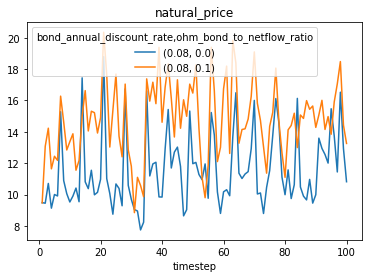

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [5]:
plot_grouped_variables_average([ "natural_price"],
                               ["bond_annual_discount_rate","ohm_bond_to_netflow_ratio"],
                               df)

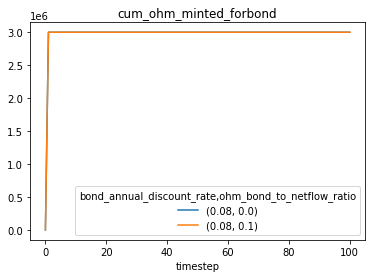

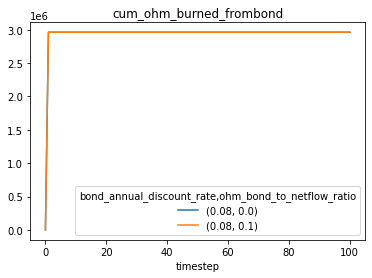

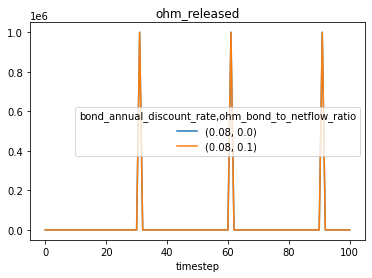

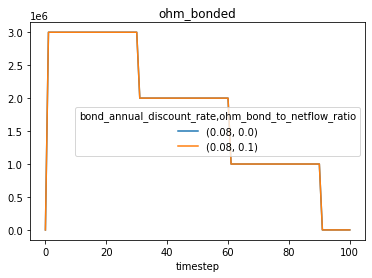

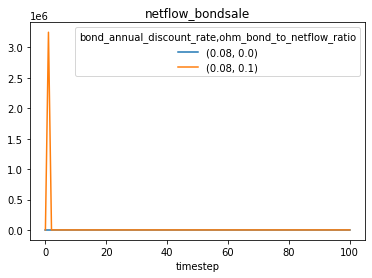

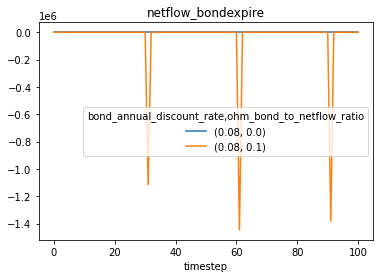

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [6]:
plot_grouped_variables_average([ "cum_ohm_minted_forbond","cum_ohm_burned_frombond","ohm_released","ohm_bonded","netflow_bondsale","netflow_bondexpire"],
                               ["bond_annual_discount_rate","ohm_bond_to_netflow_ratio"],
                               df)